In [8]:
#%%



import pandas as pd
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
import geopandas as gpd

import requests
import time
from multiprocessing import Pool

df = pd.read_csv('hdb-property-information.csv')
print(df.columns)

important_housing_columns = ['blk_no','street','market_hawker','miscellaneous','total_dwelling_units']
print(df.columns)
housing_df = df[important_housing_columns]
print(len(housing_df))
print(housing_df.head())

df_2 = pd.read_json('buildings.json')
important_building_columns = ['BLK_NO','ROAD_NAME','LATITUDE','LONGTITUDE']
print(df_2.columns)
building_df = df_2[important_building_columns].rename(columns={'BLK_NO':'blk_no'}).rename(columns={'ROAD_NAME':'street'})
print(len(building_df))
print(building_df.columns)
print(building_df.head())


Index(['blk_no', 'street', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'miscellaneous', 'multistorey_carpark',
       'precinct_pavilion', 'bldg_contract_town', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental'],
      dtype='object')
Index(['blk_no', 'street', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'miscellaneous', 'multistorey_carpark',
       'precinct_pavilion', 'bldg_contract_town', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental'],
      dtype='object')
12200
  blk_no             street market_hawker miscellaneous  tot

In [14]:
combined = housing_df.merge(building_df,on=['blk_no','street'],how='inner')
print(len(combined))
print(combined)
combined.isnull().values.any()

1406
     blk_no          street market_hawker miscellaneous  total_dwelling_units  \
0         1   GEYLANG SERAI             N             N                     0   
1         1   GEYLANG SERAI             N             N                     0   
2         1   GEYLANG SERAI             N             N                     0   
3         1   GEYLANG SERAI             N             N                     0   
4         1   TAMPINES WALK             N             Y                     0   
5         1   TAMPINES WALK             N             Y                     0   
6         1   TAMPINES WALK             N             Y                     0   
7         1   TAMPINES WALK             N             Y                     0   
8         1   TAMPINES WALK             N             Y                     0   
9         1   TAMPINES WALK             N             Y                     0   
10        1   TAMPINES WALK             N             Y                     0   
11        1   TAMPINES 

False

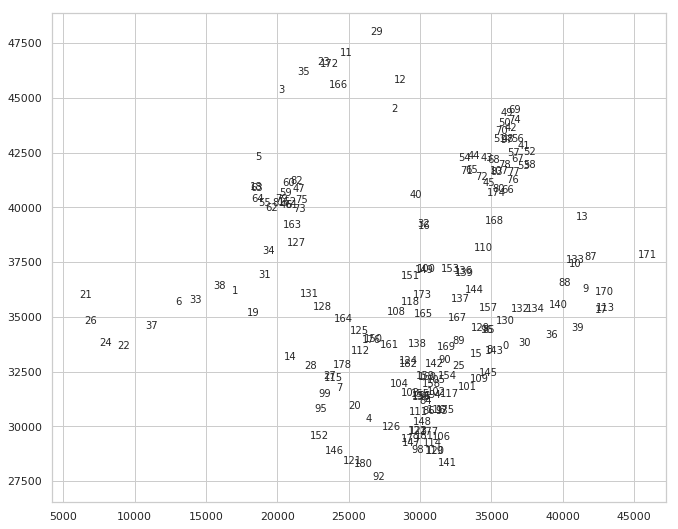

In [5]:

def plot_map(sf, x_lim=None, y_lim=None, figsize=(11, 9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize=figsize)
    id = 0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')

        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id + 1

    if (x_lim != None) & (y_lim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)


plot_map(sf)